In [17]:
import pandas as pd
df = pd.read_csv('/content/insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [18]:
df = df.drop(['_c39','policy_number','insured_zip','incident_location','policy_state','incident_state','incident_city','insured_relationship','policy_bind_date','insured_zip','auto_make','auto_model','auto_year'], axis=1)

In [19]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [20]:
import numpy as np

# Replace '?' with NaN
df['police_report_available'].replace('?', np.nan, inplace=True)
df['property_damage'].replace('?', np.nan, inplace=True)

# Verify changes
print(df['police_report_available'].unique())
print(df['property_damage'].unique())


['YES' nan 'NO']
['YES' nan 'NO']


In [21]:
# Drop rows where any NaN values are present in the specified columns
df.dropna(subset=['police_report_available', 'property_damage'], inplace=True)

# Verify changes
print(df.head())


   months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
2                 134   29    100/300               2000   
4                 228   44   500/1000               1000   
5                 256   39    250/500               1000   
8                  27   33    100/300                500   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   
5                1351.10               0      FEMALE                     PhD   
8                1442.99               0      FEMALE                     PhD   

  insured_occupation insured_hobbies  ...  number_of_vehicles_involved  \
0       craft-repair        sleeping  ...                            1   
2         

In [22]:
# Fill NaN values with a specific value, e.g., 'Unknown'
df['police_report_available'].fillna('Unknown', inplace=True)
df['property_damage'].fillna('Unknown', inplace=True)
print(df['police_report_available'].unique())
print(df['property_damage'].unique())


['YES' 'NO']
['YES' 'NO']


In [23]:
null_counts = df.isnull().sum()
print(null_counts)

months_as_customer              0
age                             0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          43
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
fraud_reported                  0
dtype: int64


In [24]:

df.duplicated().sum()

0

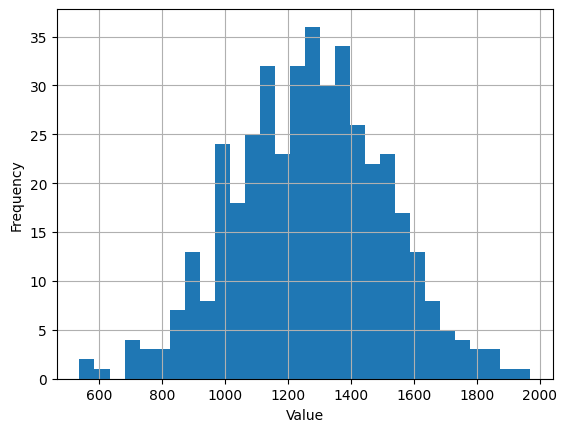

In [25]:
import matplotlib.pyplot as plt
df['policy_annual_premium'].hist(bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


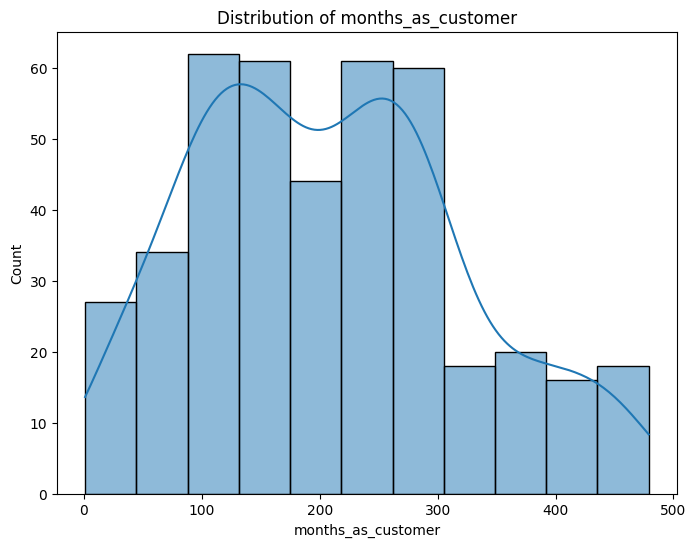

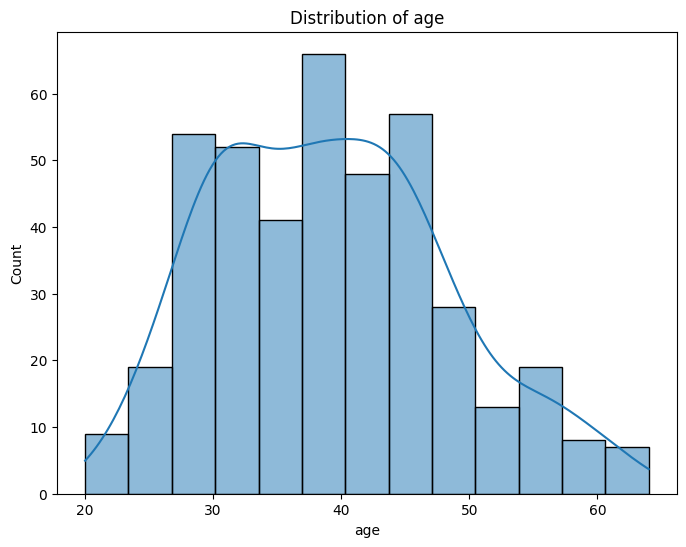

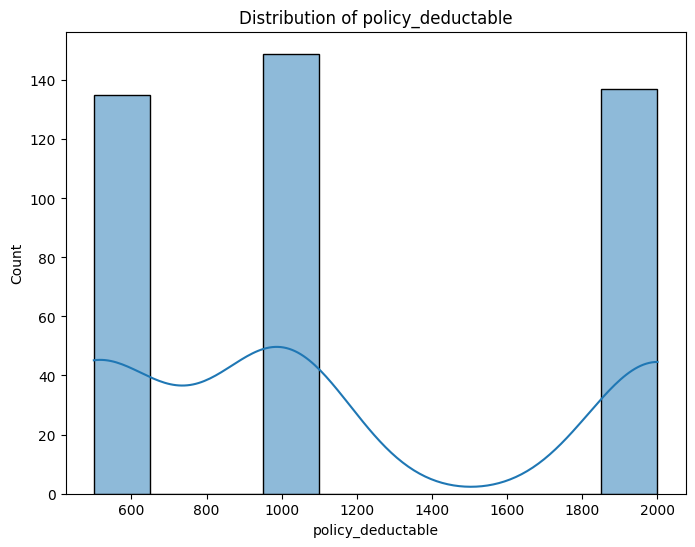

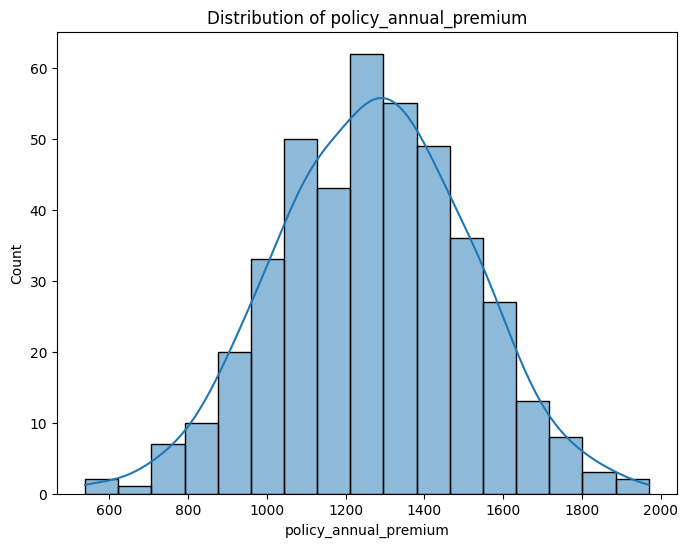

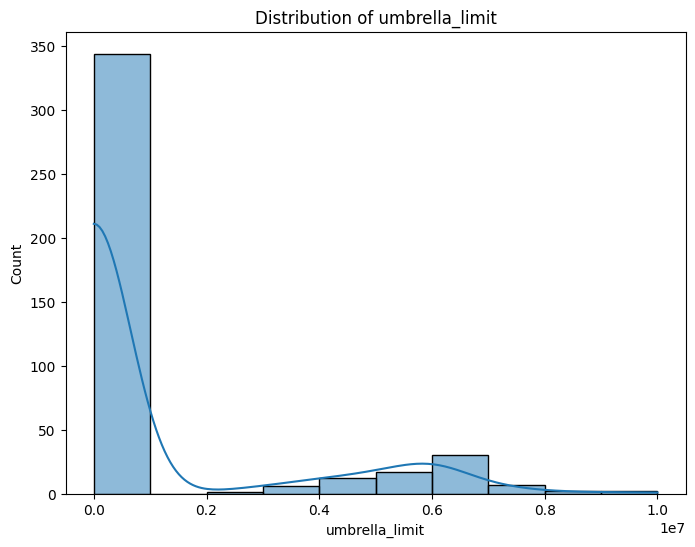

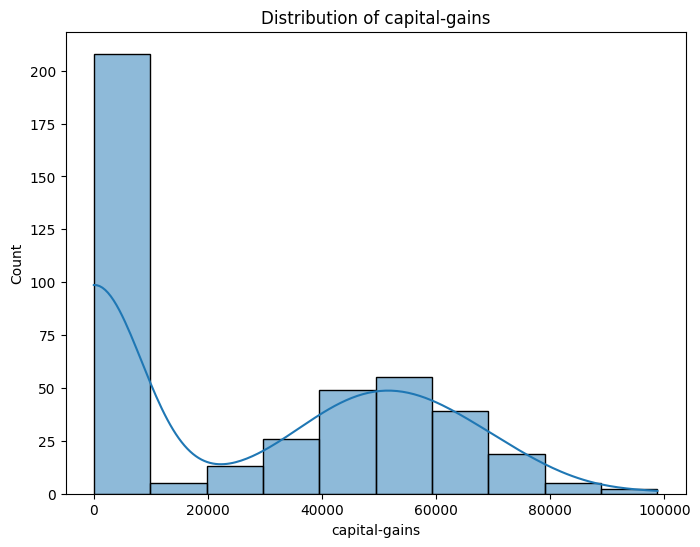

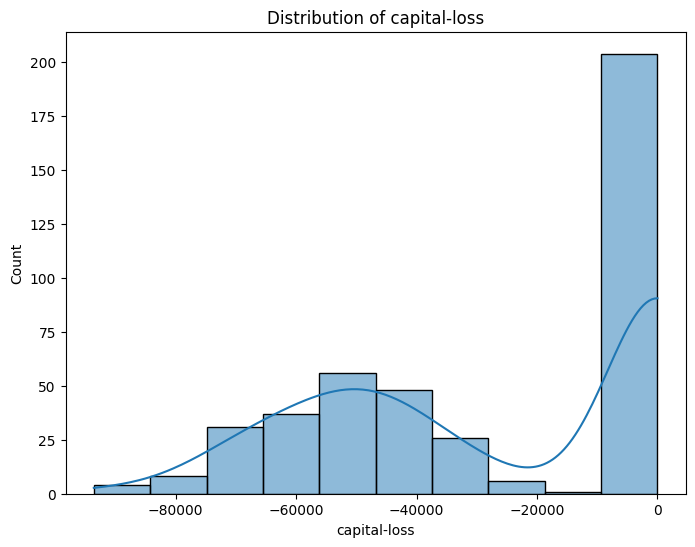

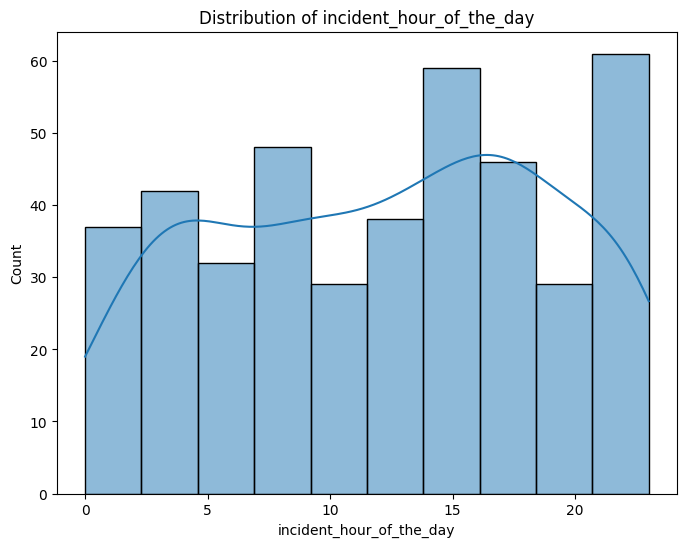

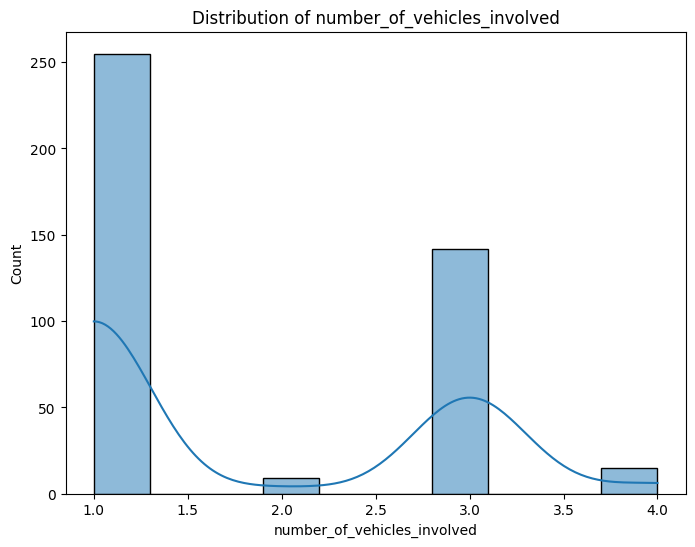

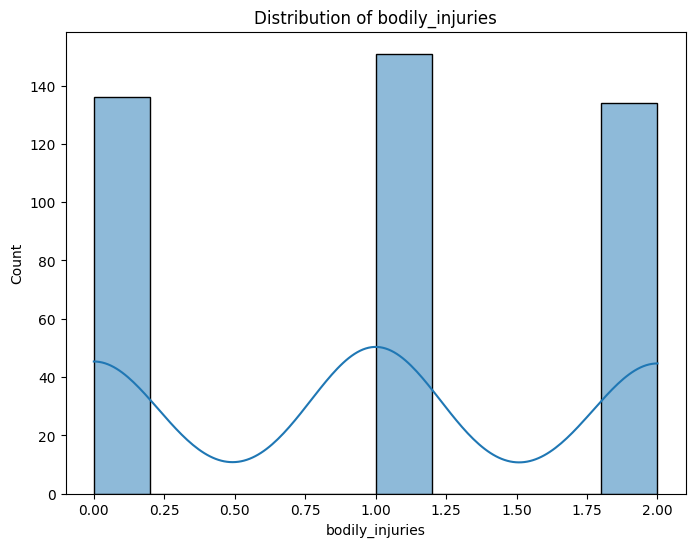

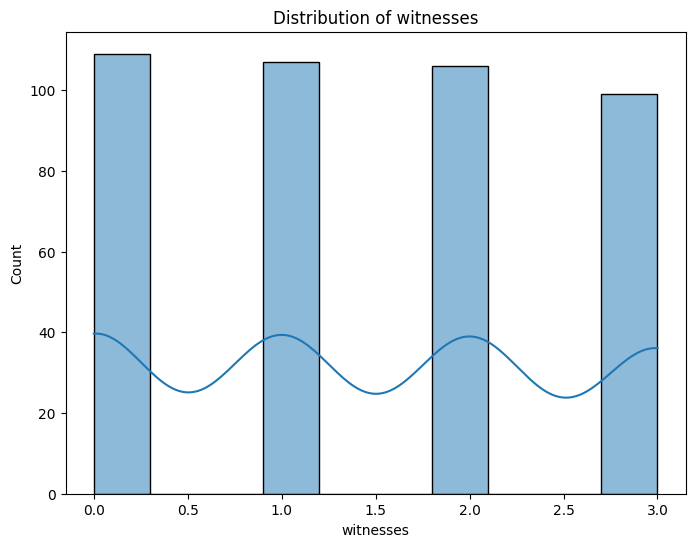

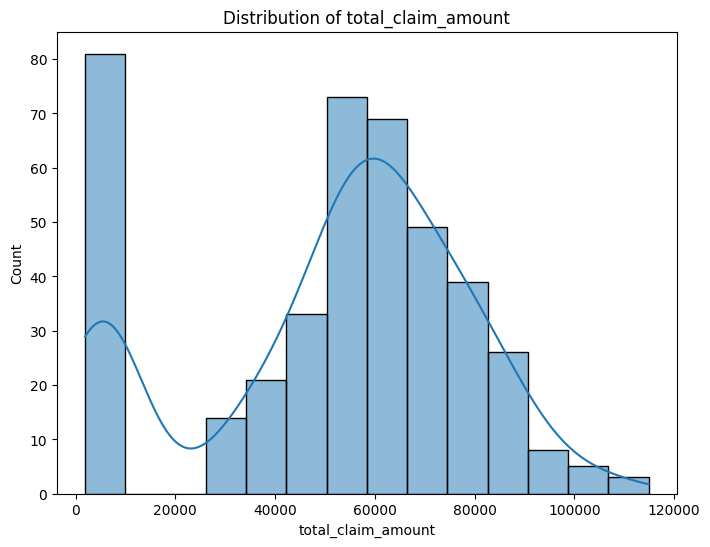

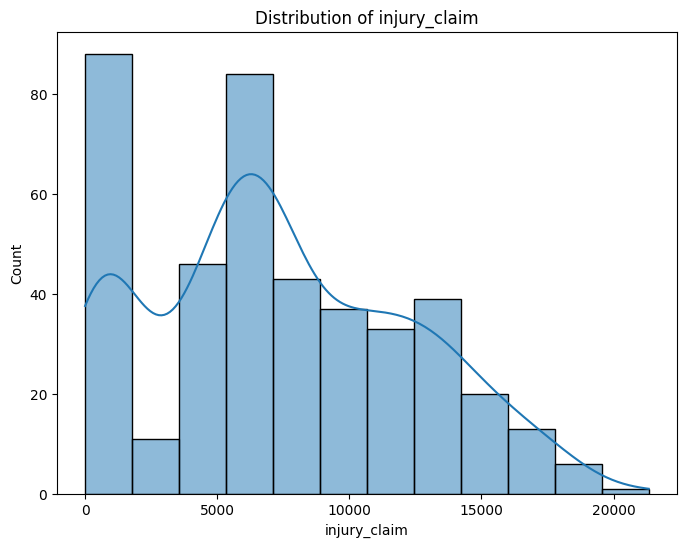

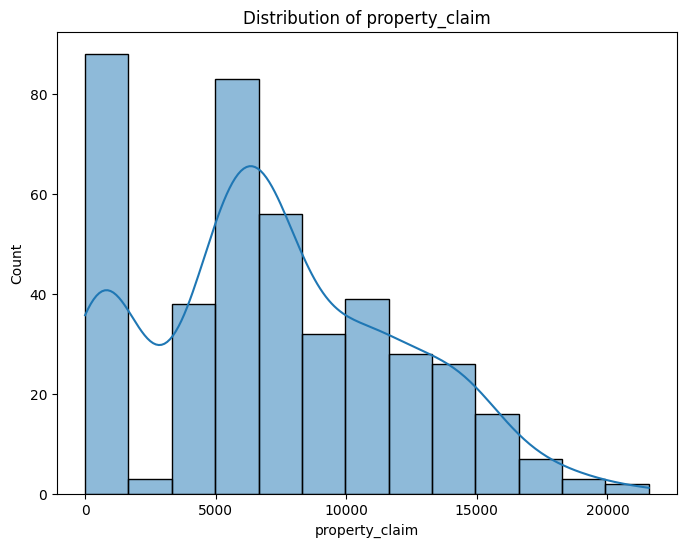

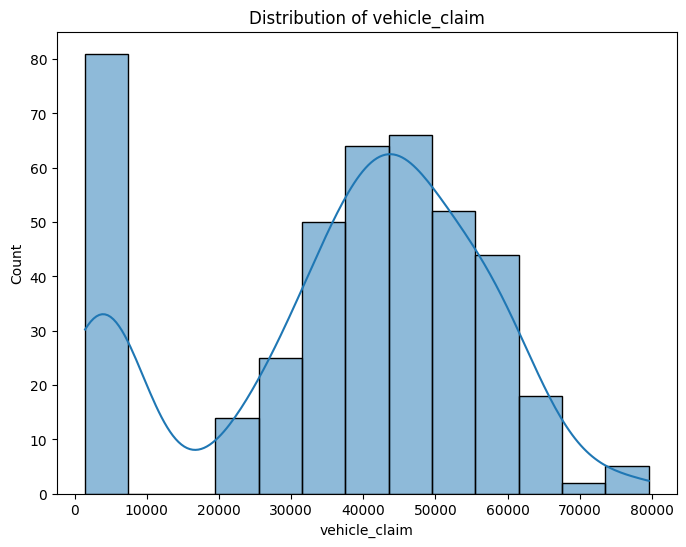

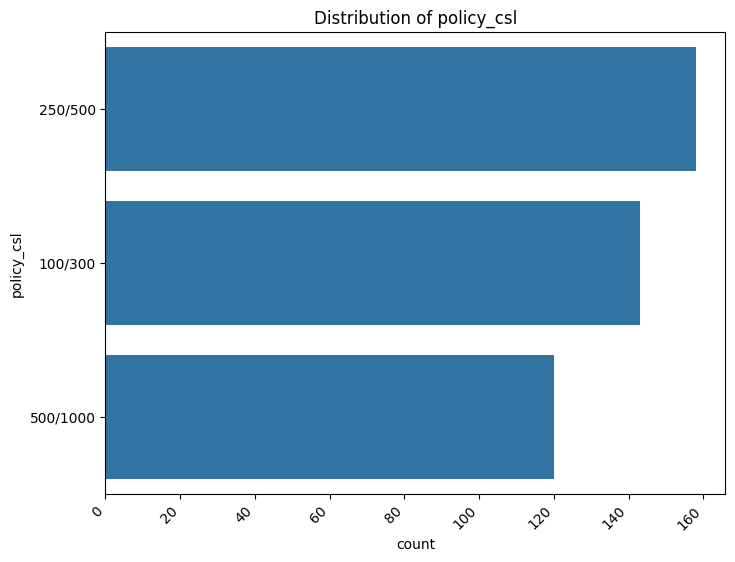

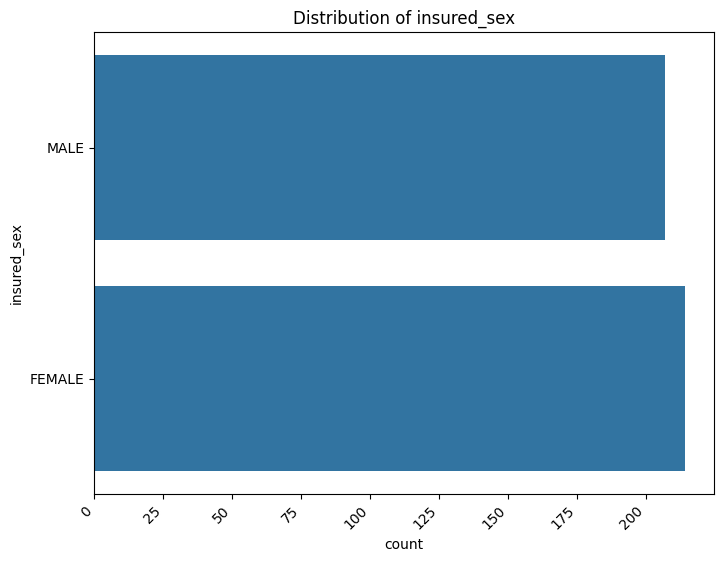

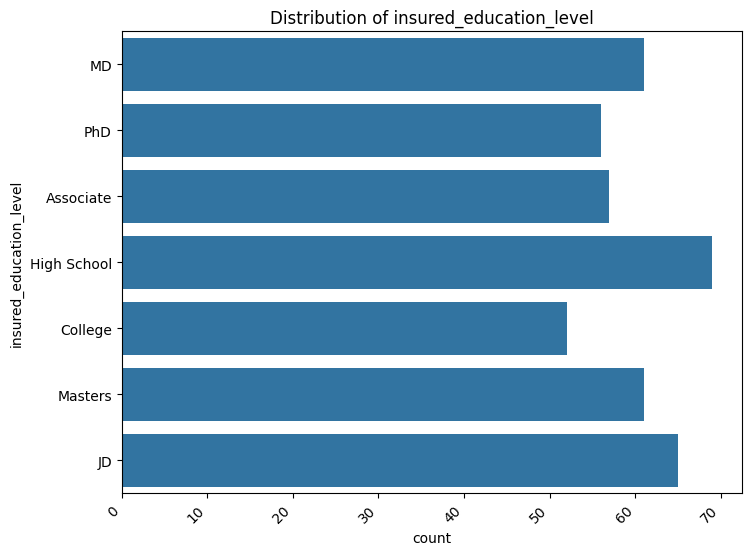

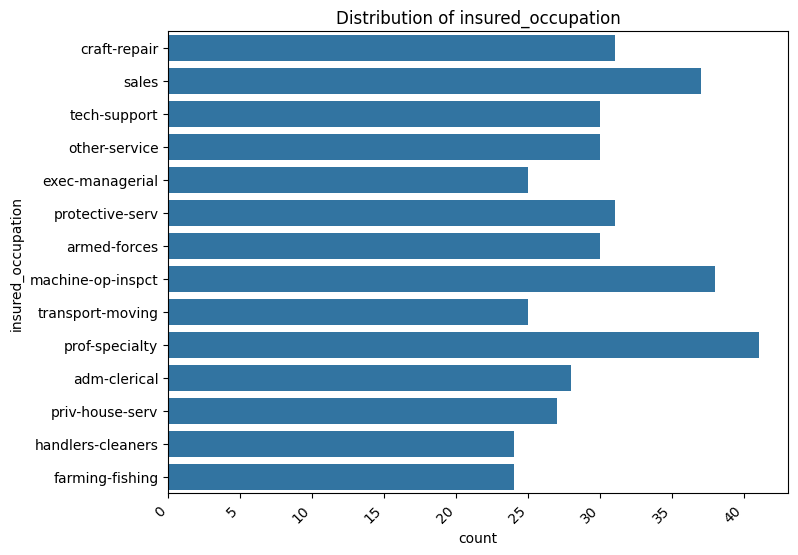

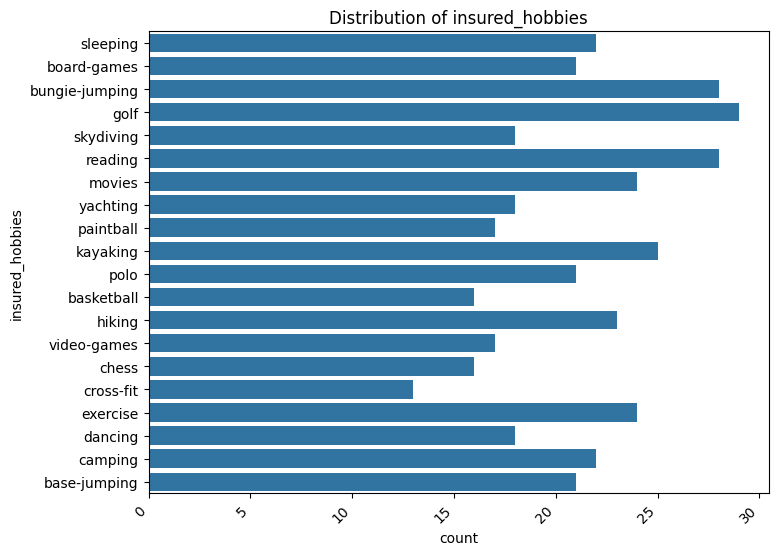

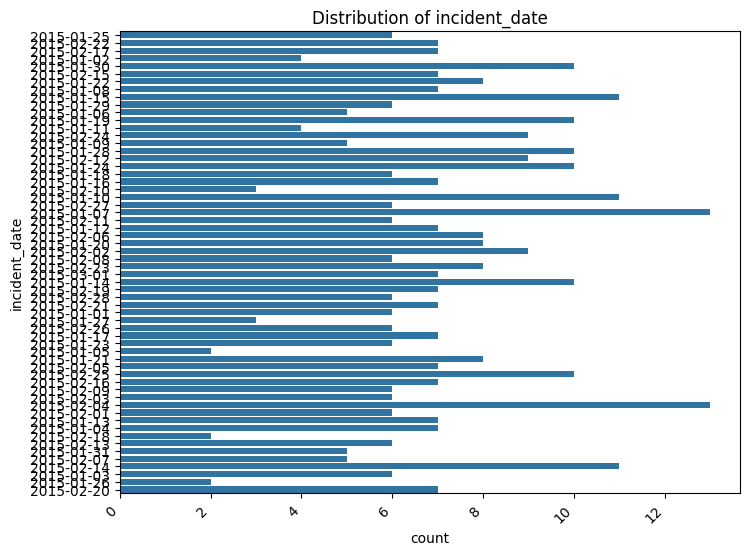

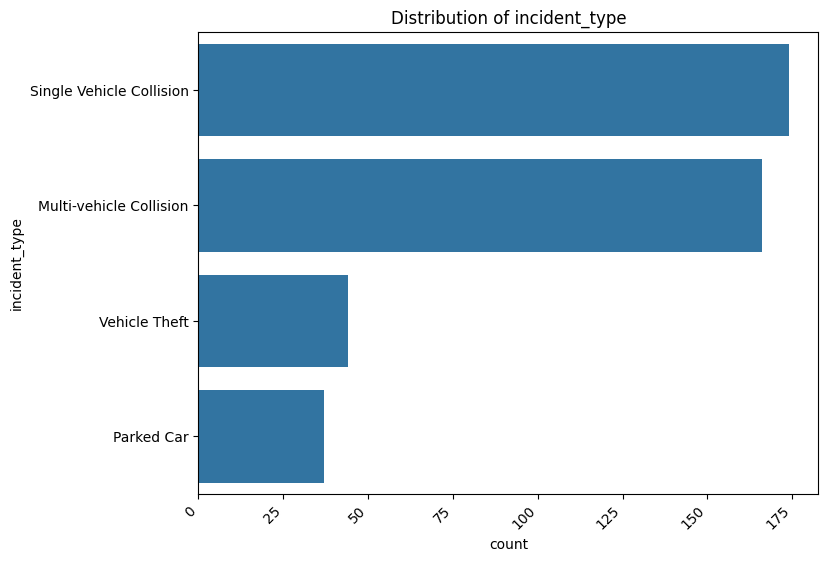

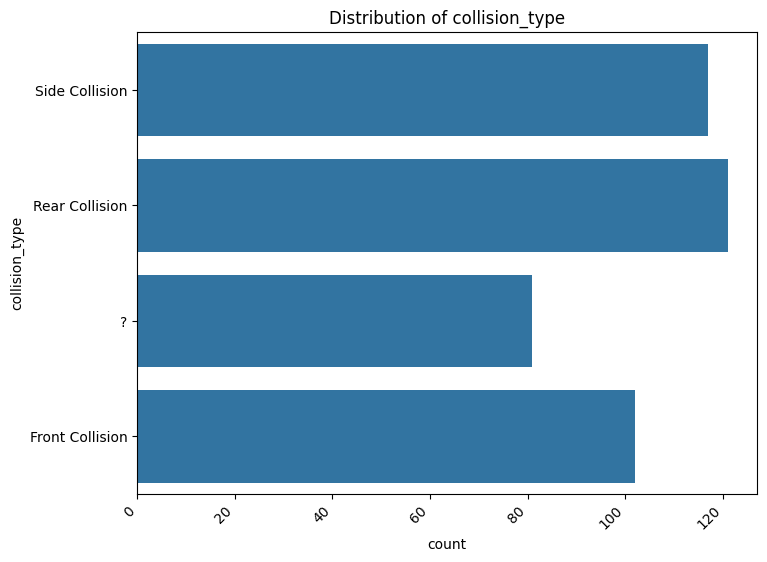

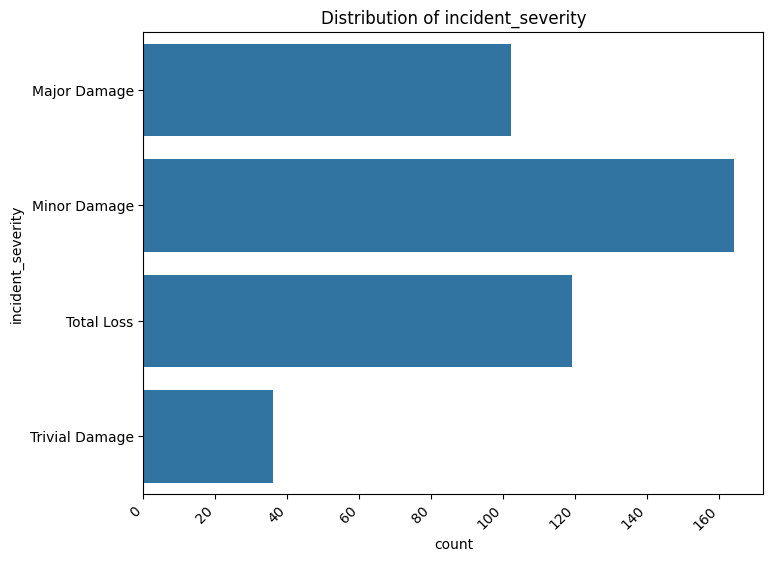

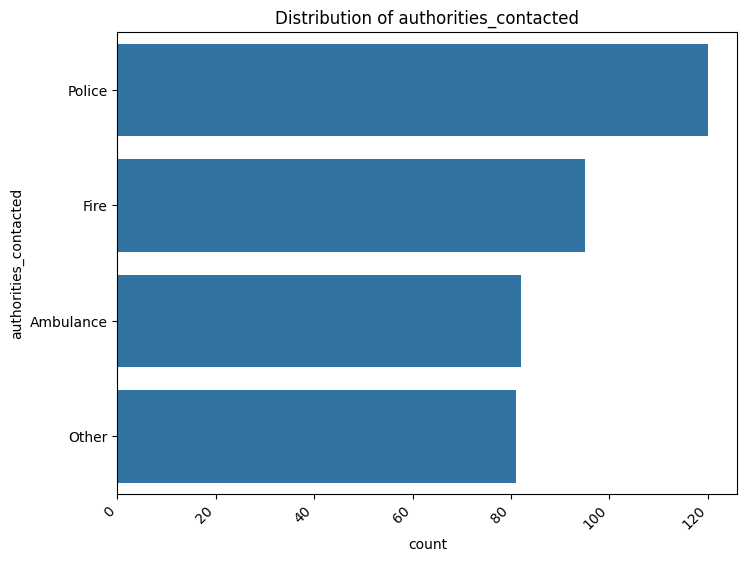

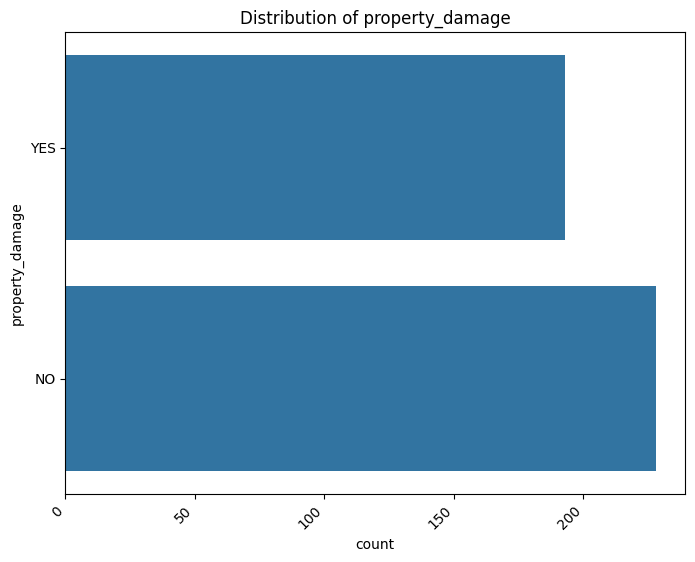

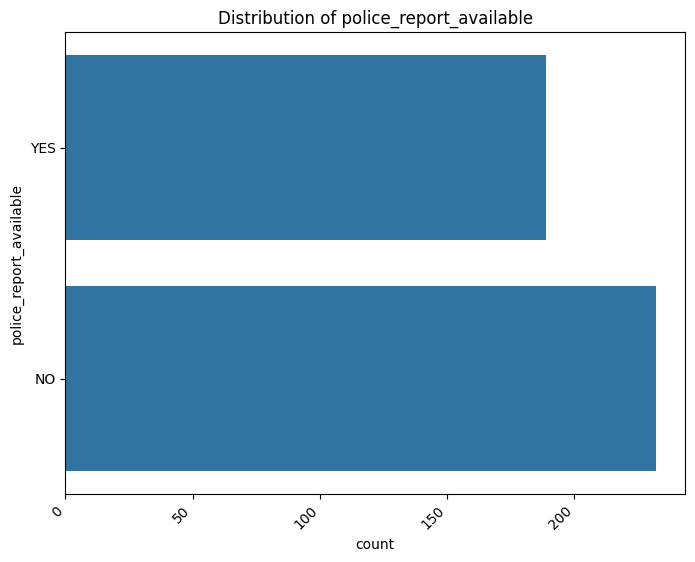

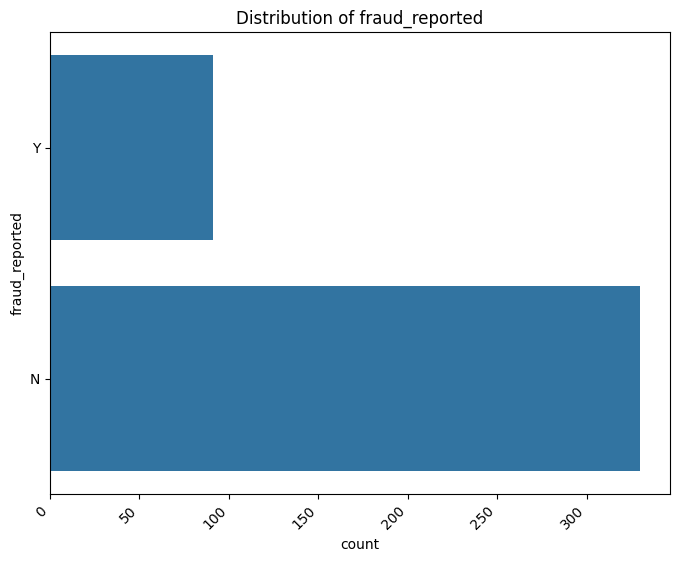

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check distributions of numerical features
numerical_features = df.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

# Check distributions of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(df[feature])
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45, ha='right')
  plt.show()


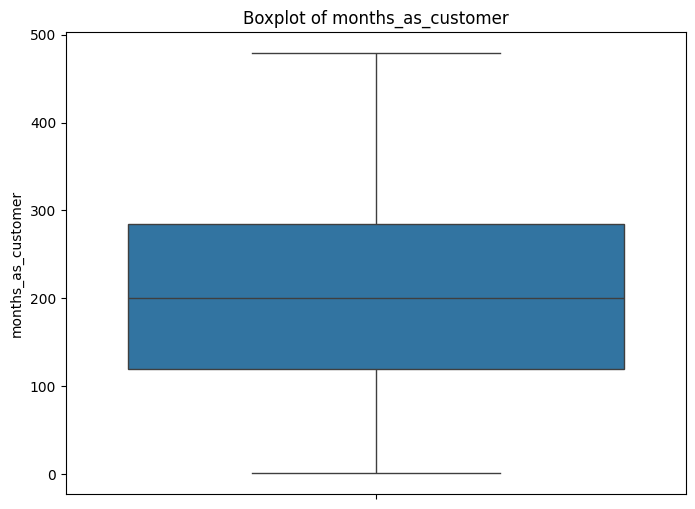

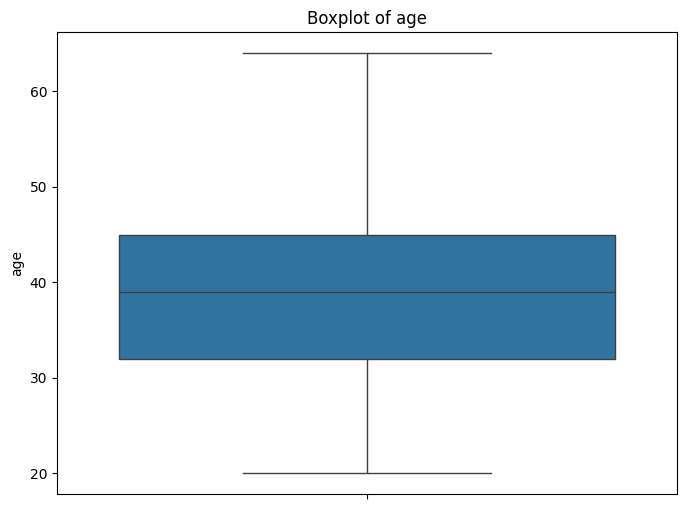

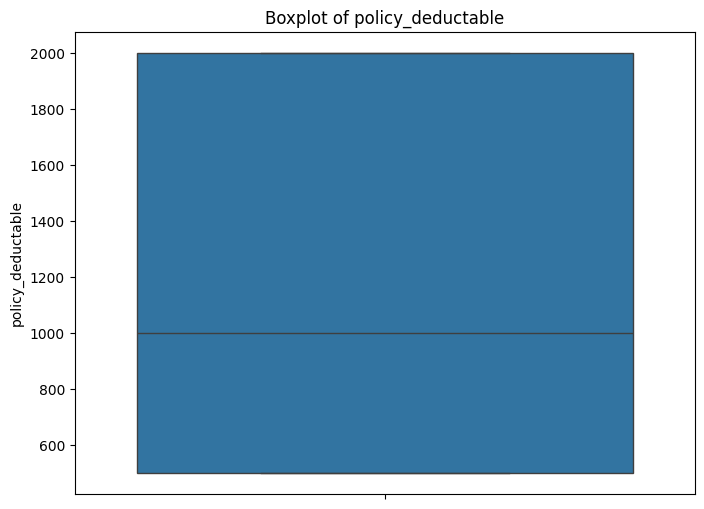

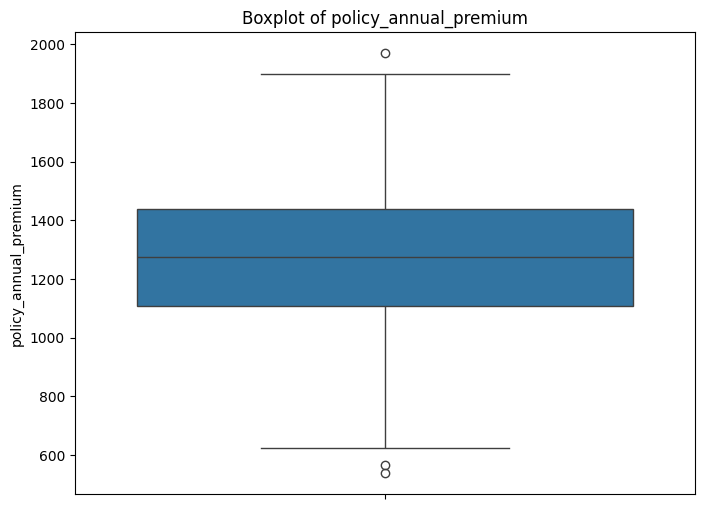

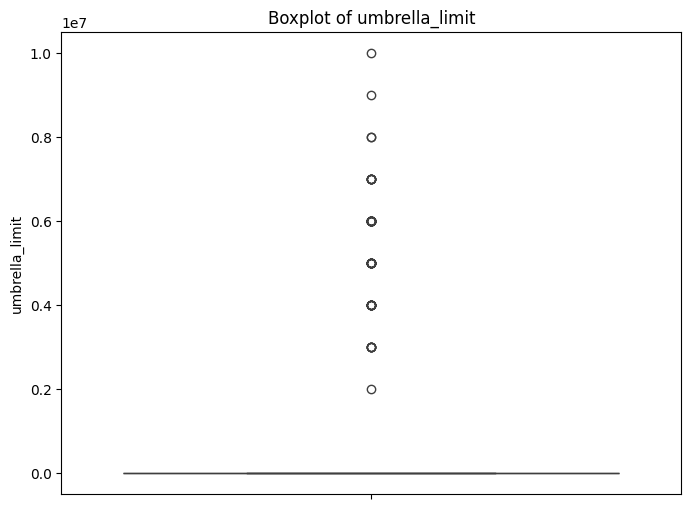

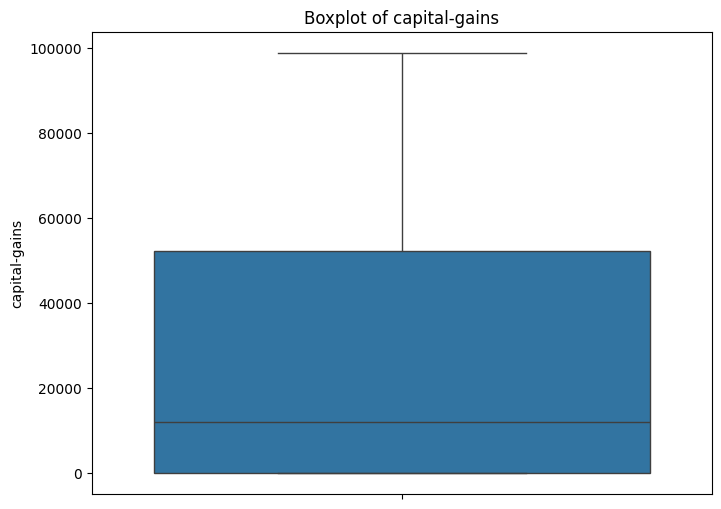

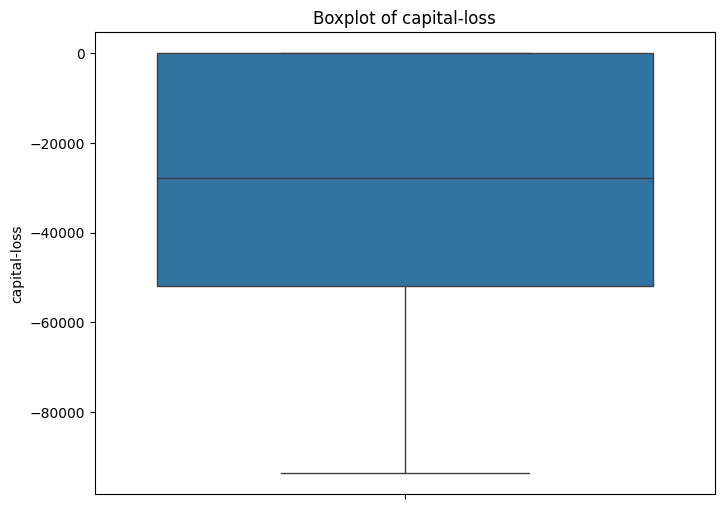

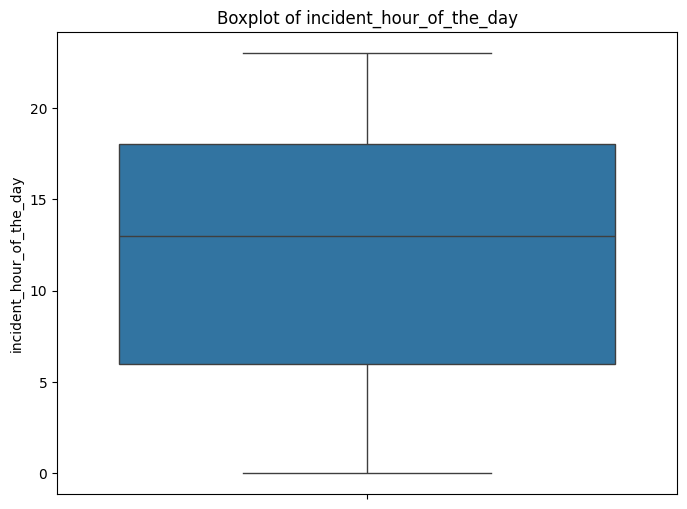

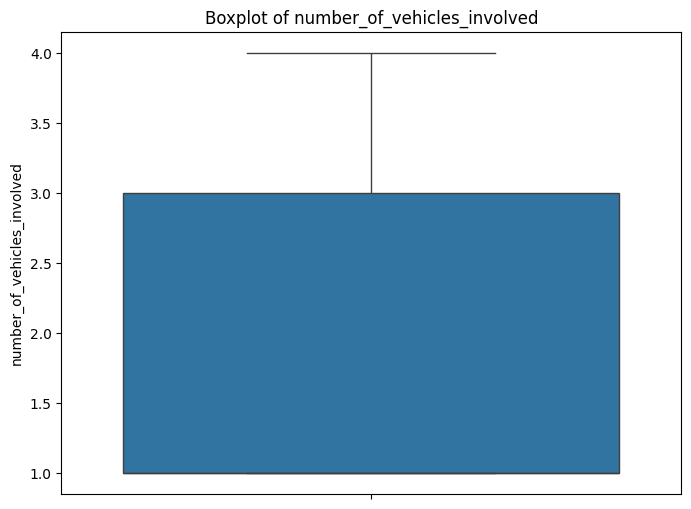

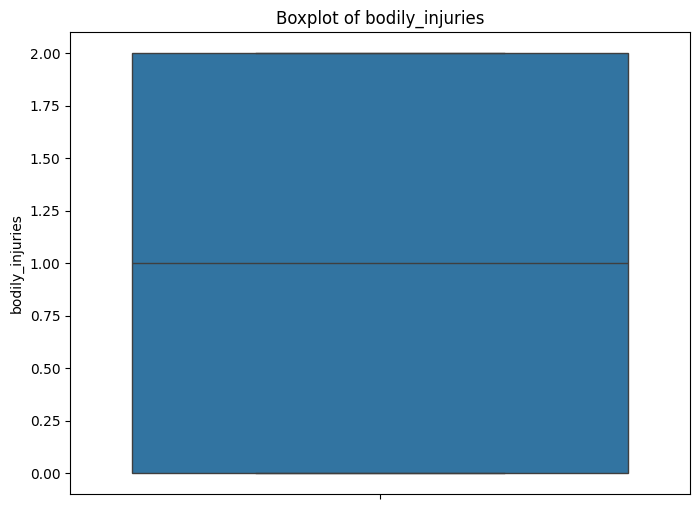

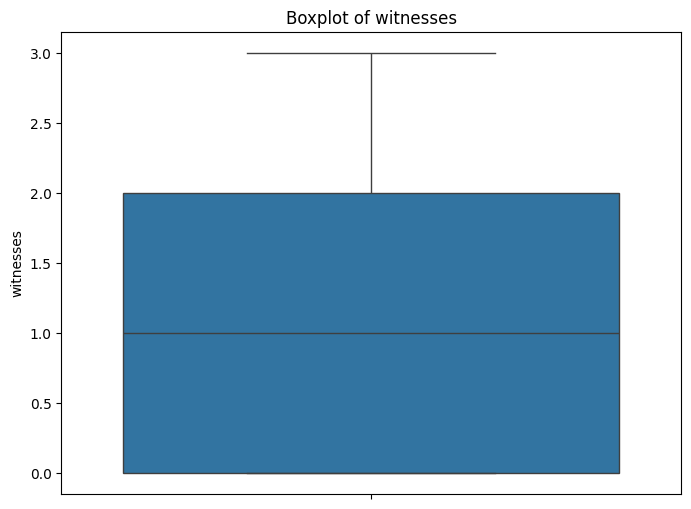

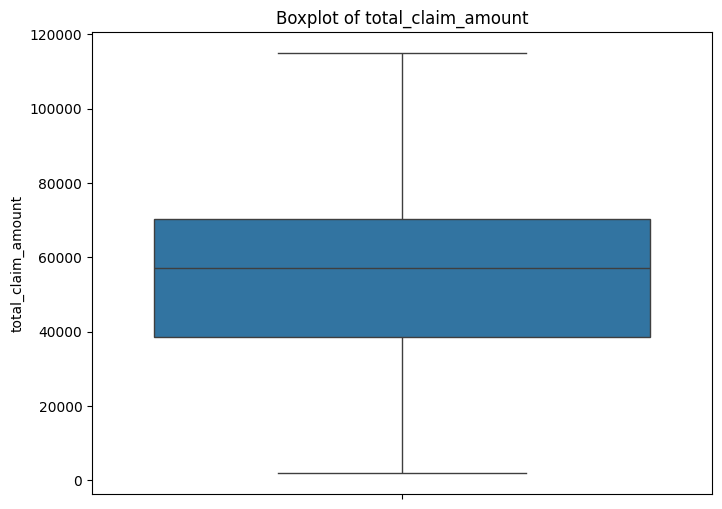

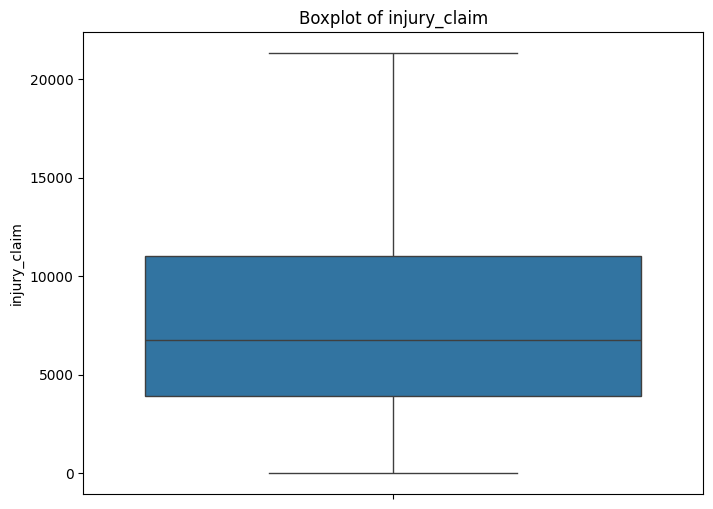

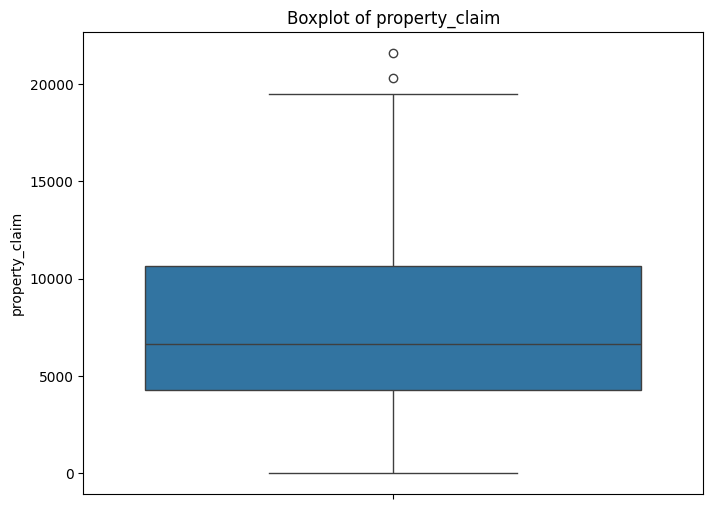

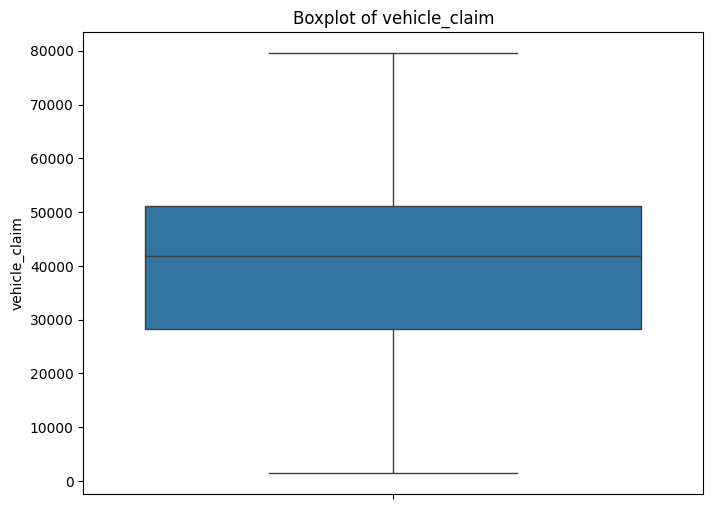

In [27]:

import matplotlib.pyplot as plt
# Check for outliers in numerical features using boxplots
numerical_features = df.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [28]:
# Calculate IQR for each numerical feature
numerical_features = df.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (340, 28)


In [29]:

# Check skewness of numerical features
numerical_features = df.select_dtypes(include=['float', 'int']).columns
skewness = df[numerical_features].skew()
print(skewness)

months_as_customer             0.305136
age                            0.338017
policy_deductable              0.363439
policy_annual_premium          0.023961
umbrella_limit                 0.000000
capital-gains                  0.355813
capital-loss                  -0.360042
incident_hour_of_the_day      -0.133796
number_of_vehicles_involved    0.572973
bodily_injuries                0.084104
witnesses                      0.035439
total_claim_amount            -0.537235
injury_claim                   0.290094
property_claim                 0.282514
vehicle_claim                 -0.576252
dtype: float64


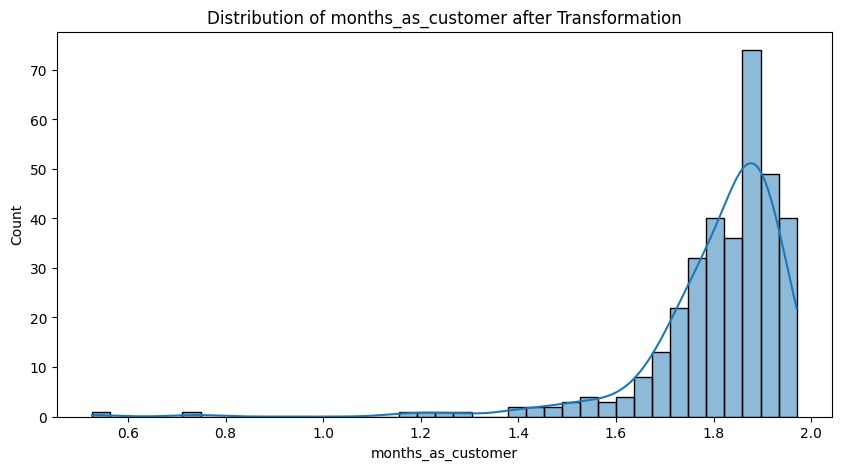

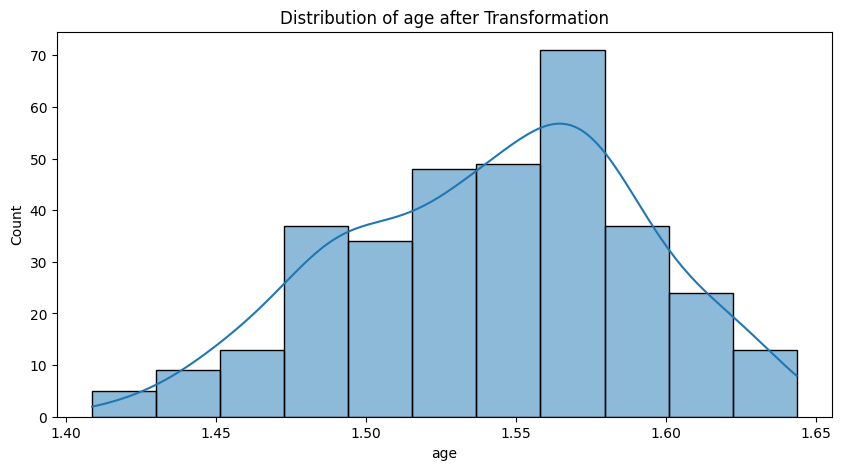

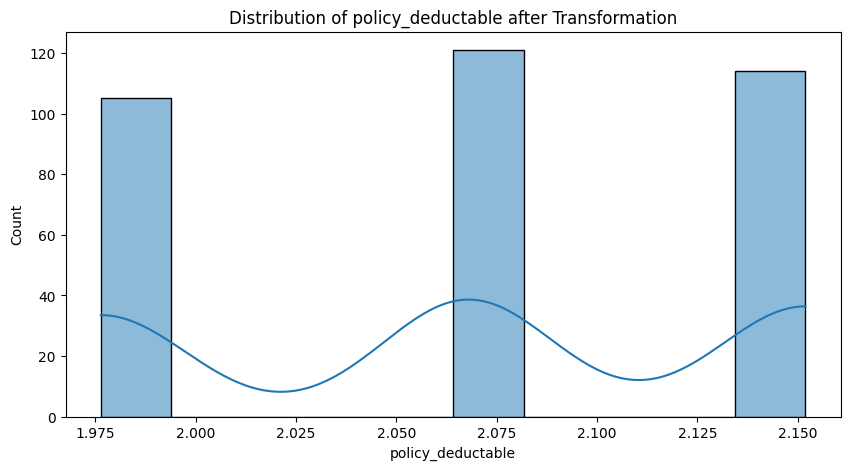

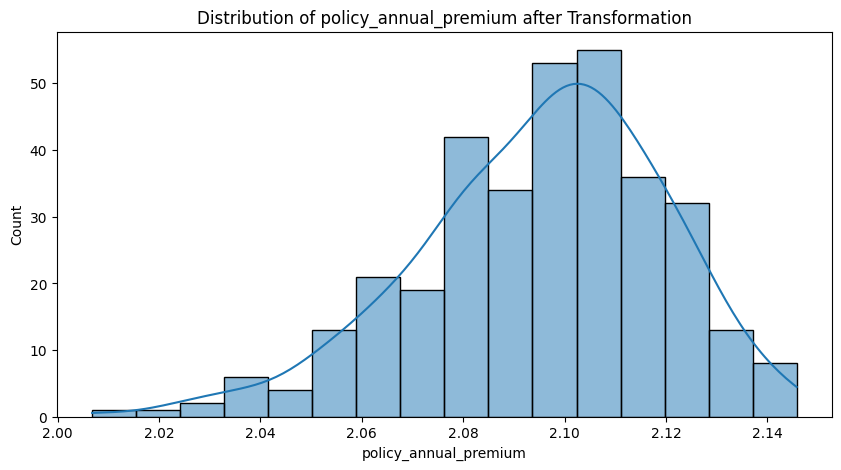

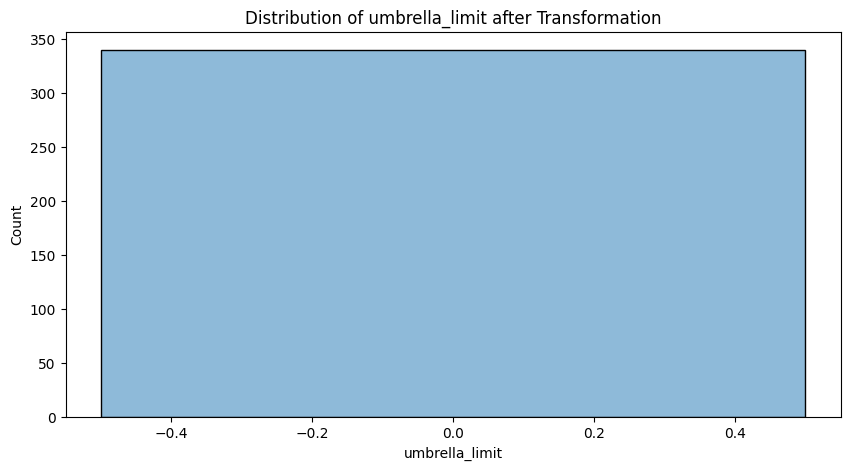

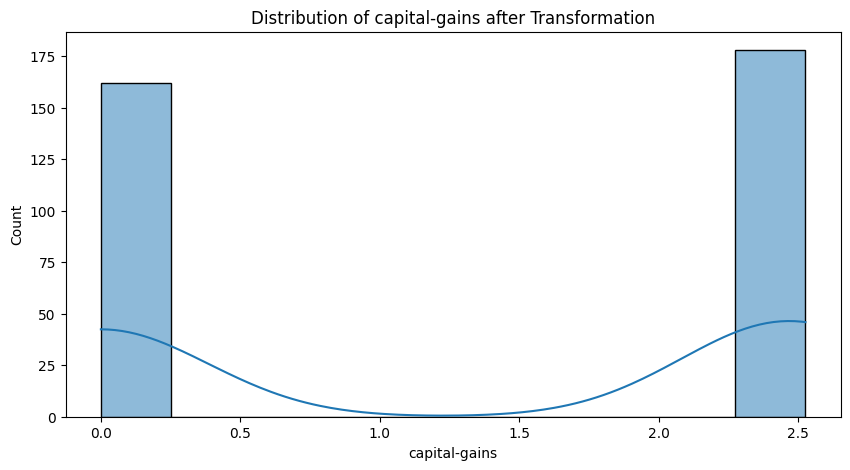

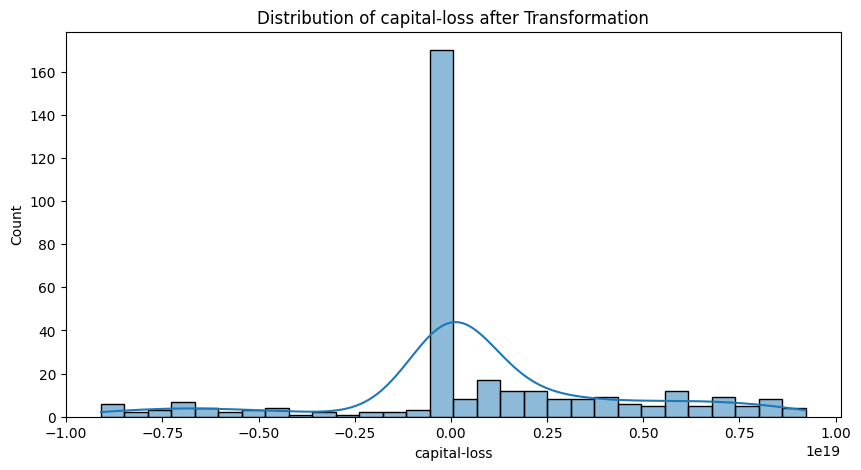

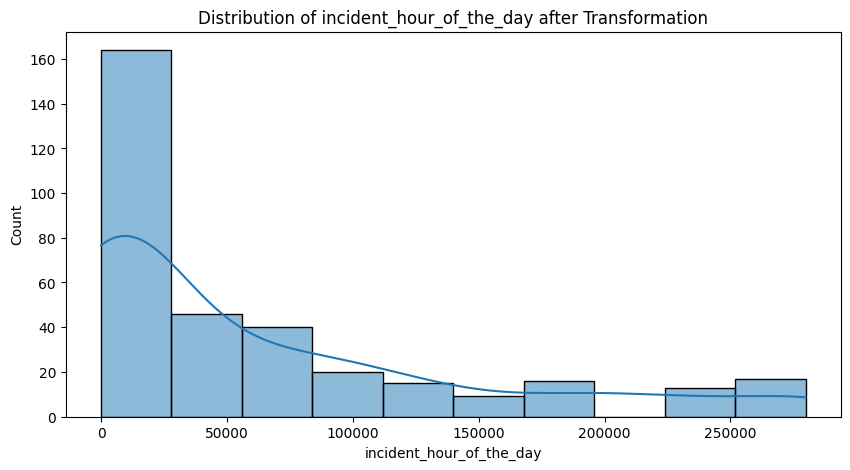

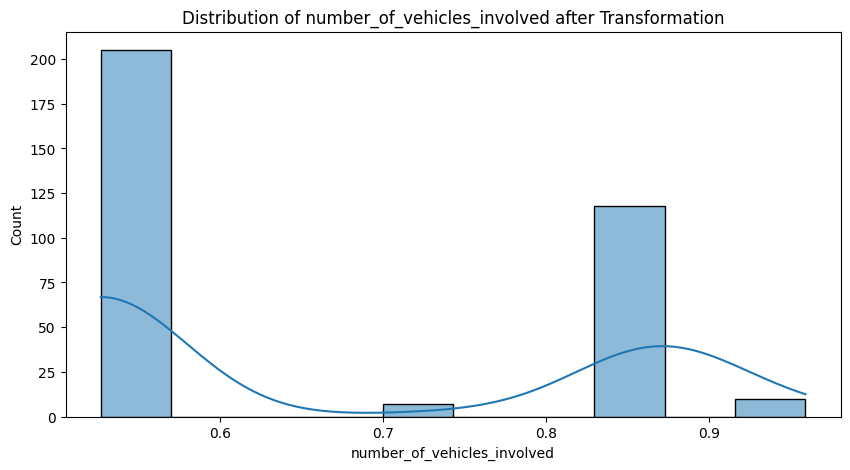

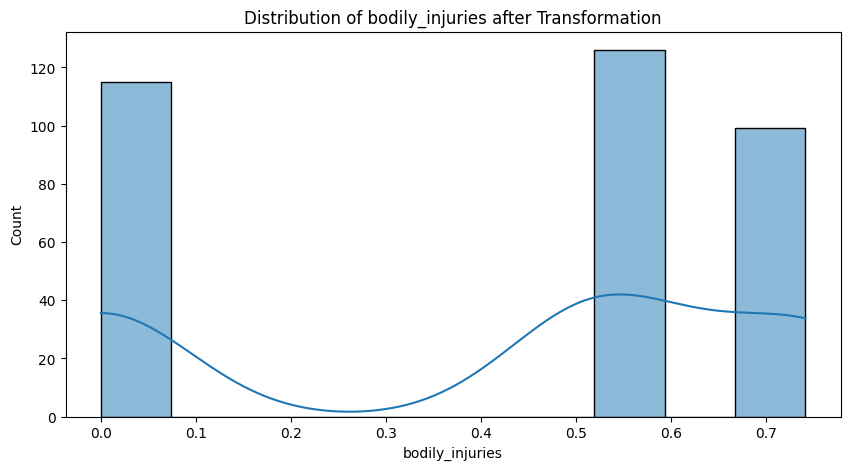

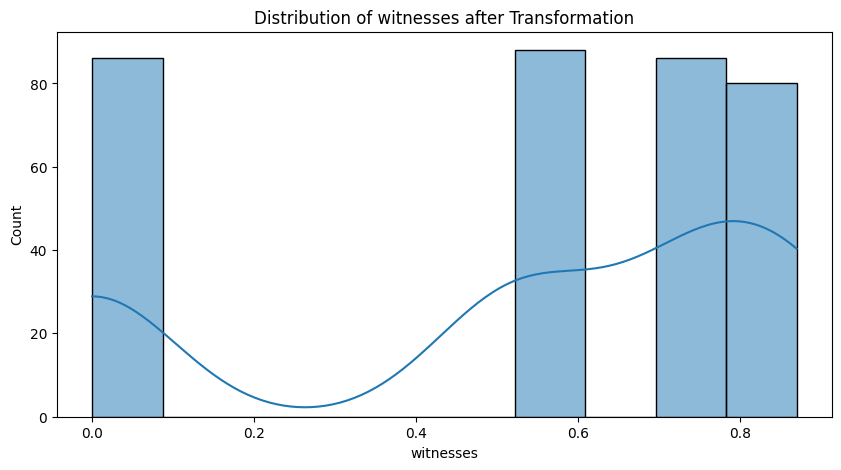

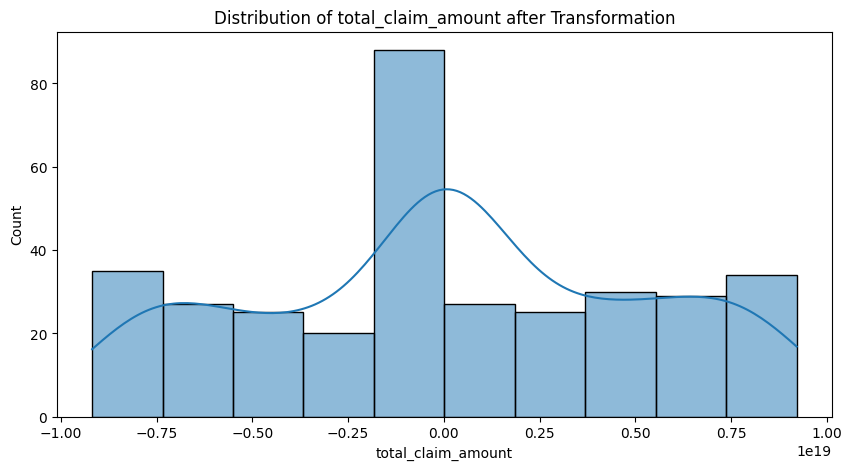

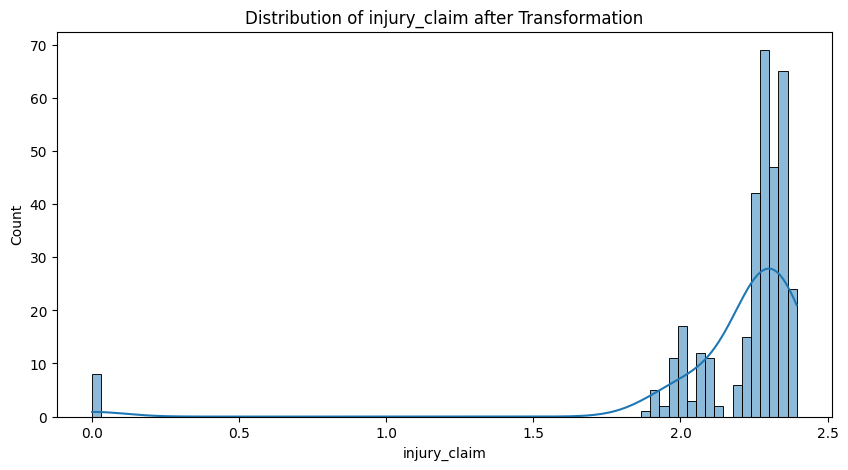

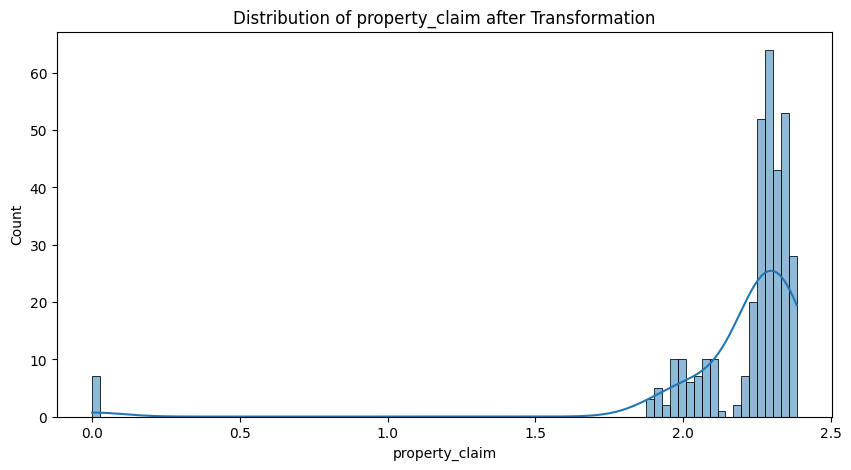

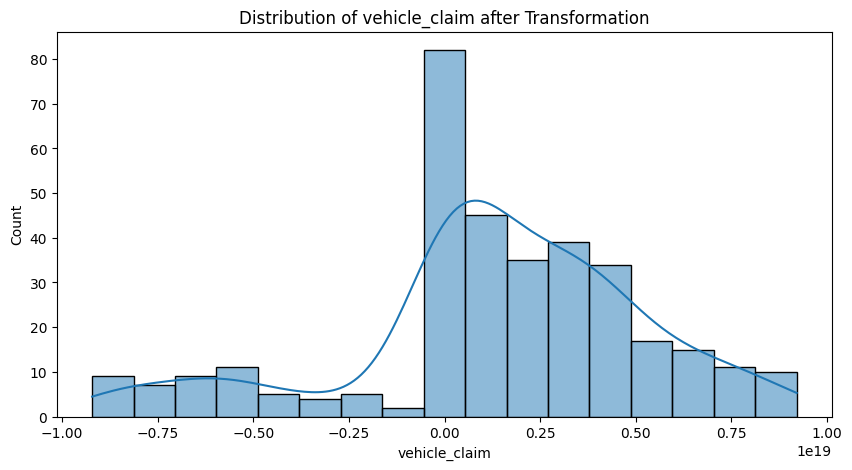

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# Handle skewness using transformations
for feature in numerical_features:
    if skewness[feature] > 0:
        df[feature] = np.log1p(df[feature])  # Log transformation for positive skew
    elif skewness[feature] < 0:
        df[feature] = df[feature] ** 2  # Square transformation for negative skew

# Visualize distributions after transformation
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature} after Transformation')
    plt.show()

In [30]:

categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the DataFrame with encoded categorical features
df

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available',
       'fraud_reported'],
      dtype='object')


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1,1000,1406.91,0,1,4,2,17,...,1,1,1,2,1,71610,6510,13020,52080,1
5,256,39,1,1000,1351.10,0,0,6,12,3,...,3,0,0,2,0,64100,6410,6410,51280,1
8,27,33,0,500,1442.99,0,0,6,7,9,...,1,0,1,1,1,27700,2770,2770,22160,0
11,447,61,0,2000,1137.16,0,0,2,3,16,...,3,1,1,2,1,114920,17680,17680,79560,0
13,121,34,0,1000,936.61,0,0,4,1,3,...,1,0,1,1,0,7280,1120,1120,5040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,245,40,2,1000,1361.45,0,1,6,5,4,...,1,1,0,2,1,82170,7470,7470,67230,0
984,163,36,1,1000,1503.21,0,1,4,7,6,...,1,1,2,1,0,51390,5710,11420,34260,0
988,295,46,0,500,1672.88,0,0,2,1,7,...,1,1,1,1,0,60700,12140,6070,42490,0
991,257,44,0,1000,1280.88,0,1,4,7,1,...,1,0,0,1,0,46980,0,5220,41760,0


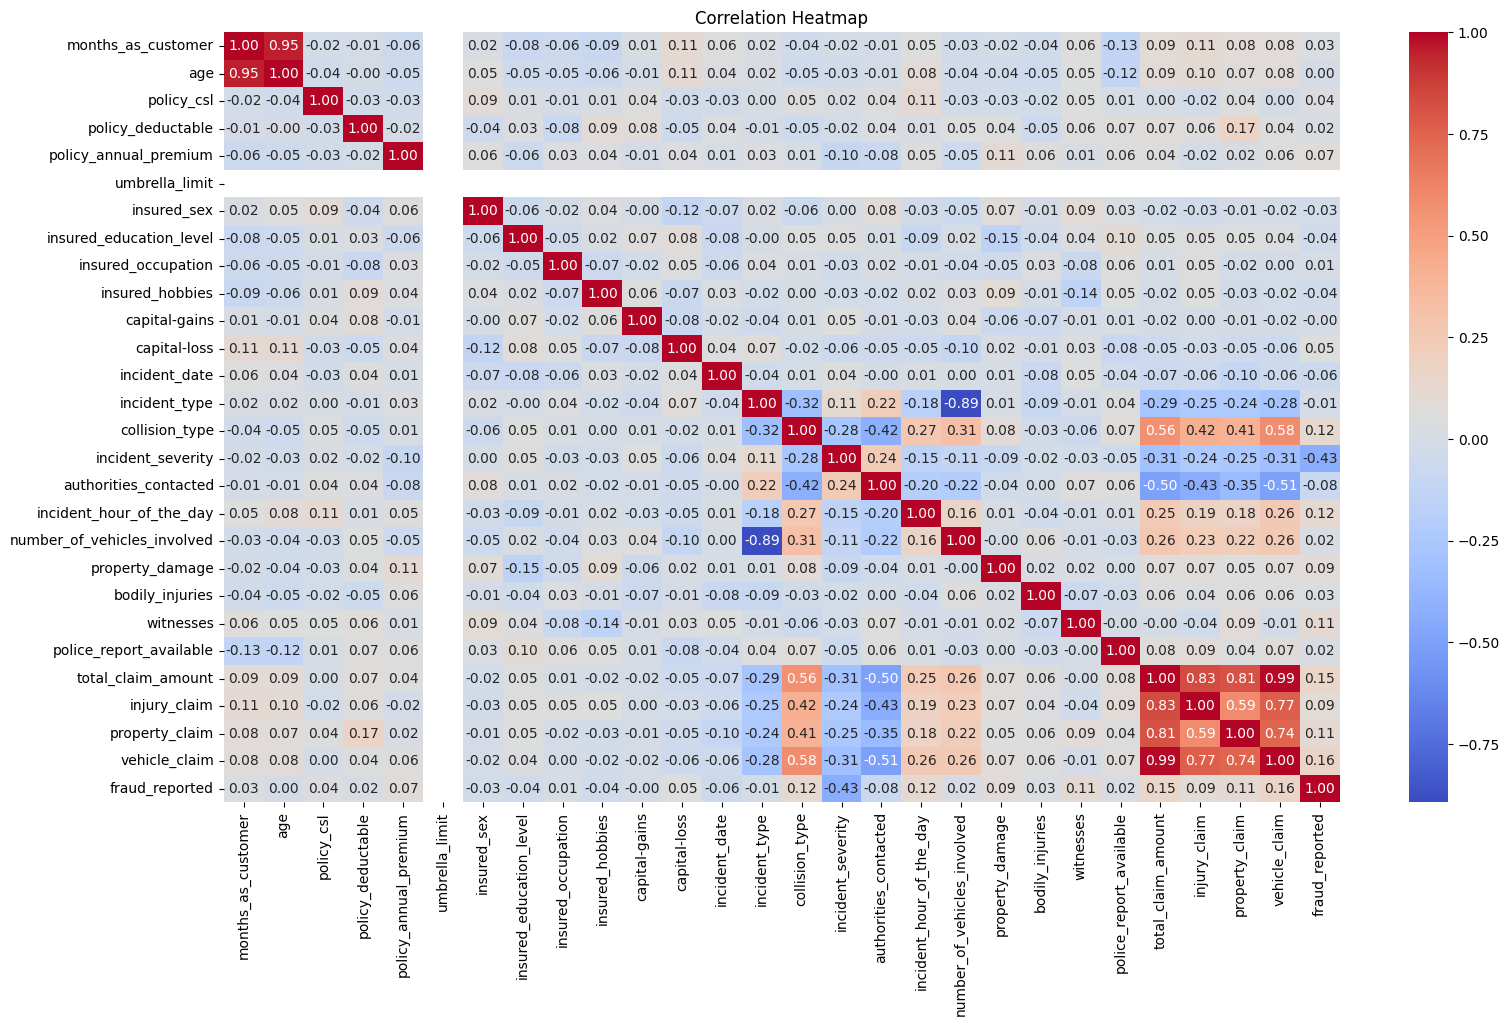

In [31]:

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [32]:

correlation_matrix = df.corr()

# Print the correlation matrix as numbers
print(correlation_matrix)

                             months_as_customer       age  policy_csl  \
months_as_customer                     1.000000  0.948379   -0.024803   
age                                    0.948379  1.000000   -0.038547   
policy_csl                            -0.024803 -0.038547    1.000000   
policy_deductable                     -0.010742 -0.004237   -0.033174   
policy_annual_premium                 -0.059150 -0.050911   -0.028892   
umbrella_limit                              NaN       NaN         NaN   
insured_sex                            0.023151  0.046628    0.088487   
insured_education_level               -0.080548 -0.052862    0.010351   
insured_occupation                    -0.061922 -0.051473   -0.010203   
insured_hobbies                       -0.093678 -0.062211    0.012205   
capital-gains                          0.009197 -0.010904    0.040458   
capital-loss                           0.107941  0.106965   -0.030168   
incident_date                          0.056119  0.

In [33]:
# Calculate fraud rate for each column
fraud_rates = df.groupby('fraud_reported')['fraud_reported'].count() / df.shape[0]
print(fraud_rates)

fraud_reported
0    0.802941
1    0.197059
Name: fraud_reported, dtype: float64


In [34]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.75
Confusion Matrix:
 [[48  3]
 [14  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.50      0.18      0.26        17

    accuracy                           0.75        68
   macro avg       0.64      0.56      0.56        68
weighted avg       0.71      0.75      0.70        68



In [35]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, nb_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


SVM Results:
Accuracy: 0.75
Confusion Matrix:
 [[51  0]
 [17  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        51
           1       0.00      0.00      0.00        17

    accuracy                           0.75        68
   macro avg       0.38      0.50      0.43        68
weighted avg       0.56      0.75      0.64        68


Naive Bayes Results:
Accuracy: 0.75
Confusion Matrix:
 [[43  8]
 [ 9  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        51
           1       0.50      0.47      0.48        17

    accuracy                           0.75        68
   macro avg       0.66      0.66      0.66        68
weighted avg       0.75      0.75      0.75        68


Decision Tree Results:
Accuracy: 0.7647058823529411
Confusion Matrix:
 [[46  5]
 [11  6]]
Classification Report:
               precision    recall  f1-scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
xgb_pred = best_xgb_model.predict(X_test)

# Evaluate the best model
print("\nXGBoost Results (with Fine-tuning):")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

XGBoost Results (with Fine-tuning):
Accuracy: 0.7794117647058824
Confusion Matrix:
 [[48  3]
 [12  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.62      0.29      0.40        17

    accuracy                           0.78        68
   macro avg       0.71      0.62      0.63        68
weighted avg       0.76      0.78      0.75        68



In [51]:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression with SMOTE
model_smote = LogisticRegression()
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)

print("Logistic Regression Results (with SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

# SVM with SMOTE
svm_model_smote = SVC()
svm_model_smote.fit(X_train_resampled, y_train_resampled)
svm_pred_smote = svm_model_smote.predict(X_test)

print("\nSVM Results (with SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, svm_pred_smote)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred_smote))
print("Classification Report:\n", classification_report(y_test, svm_pred_smote))

# Naive Bayes with SMOTE
nb_model_smote = GaussianNB()
nb_model_smote.fit(X_train_resampled, y_train_resampled)
nb_pred_smote = nb_model_smote.predict(X_test)

print("\nNaive Bayes Results (with SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, nb_pred_smote)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred_smote))
print("Classification Report:\n", classification_report(y_test, nb_pred_smote))


Logistic Regression Results (with SMOTE):
Accuracy: 0.8235294117647058
Confusion Matrix:
 [[43  8]
 [ 4 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.62      0.76      0.68        17

    accuracy                           0.82        68
   macro avg       0.77      0.80      0.78        68
weighted avg       0.84      0.82      0.83        68


SVM Results (with SMOTE):
Accuracy: 0.7794117647058824
Confusion Matrix:
 [[48  3]
 [12  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.62      0.29      0.40        17

    accuracy                           0.78        68
   macro avg       0.71      0.62      0.63        68
weighted avg       0.76      0.78      0.75        68


Naive Bayes Results (with SMOTE):
Accuracy: 0.6323529411764706
Confusion Matrix:
 [[34 17]
 [ 

Decision Tree - Train Accuracy: 0.9485294117647058
Decision Tree - Test Accuracy: 0.8088235294117647


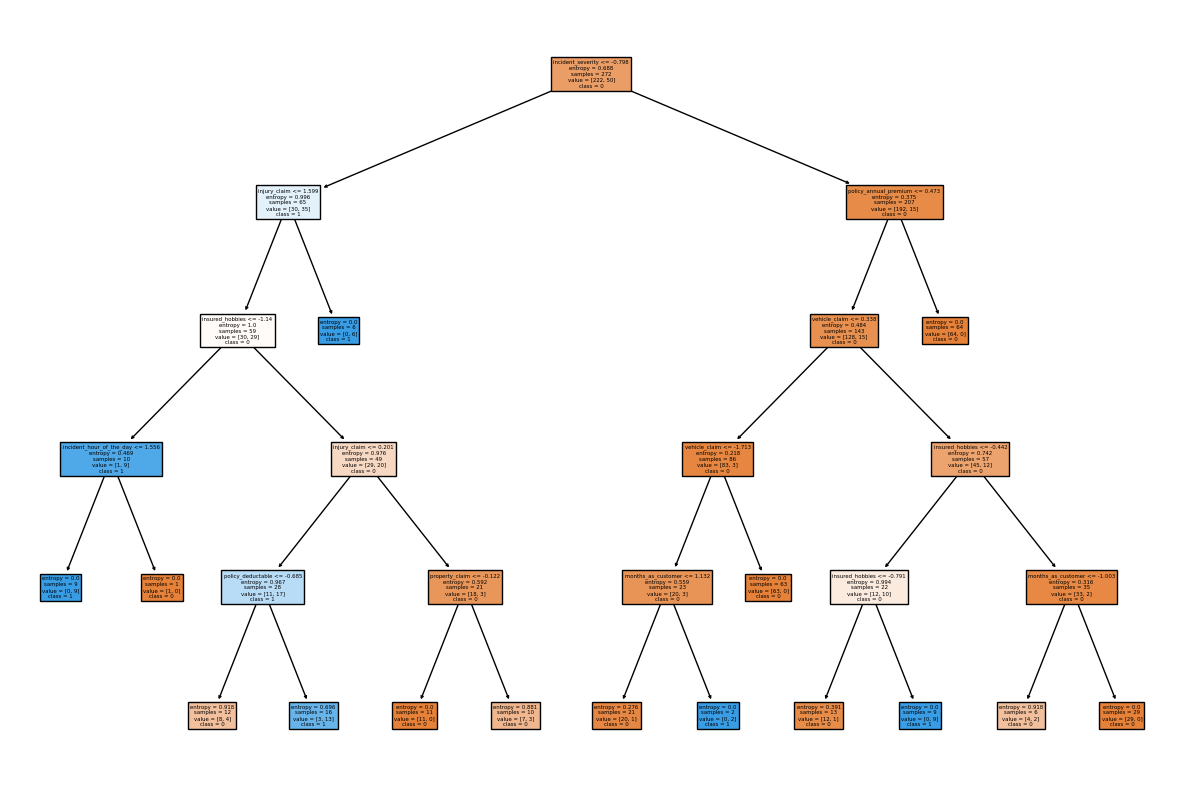

In [47]:

# Decision Tree
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) # Now GridSearchCV is defined
grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_dt = grid_search.best_estimator_

# Predictions and accuracy
y_pred_dt_train = best_dt.predict(X_train)
y_pred_dt_test = best_dt.predict(X_test)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train) # Now accuracy_score is defined
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)

print("Decision Tree - Train Accuracy:", accuracy_dt_train)
print("Decision Tree - Test Accuracy:", accuracy_dt_test)

# Visualize Decision Tree
# Assuming 'tree' is meant to be 'sklearn.tree'
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()